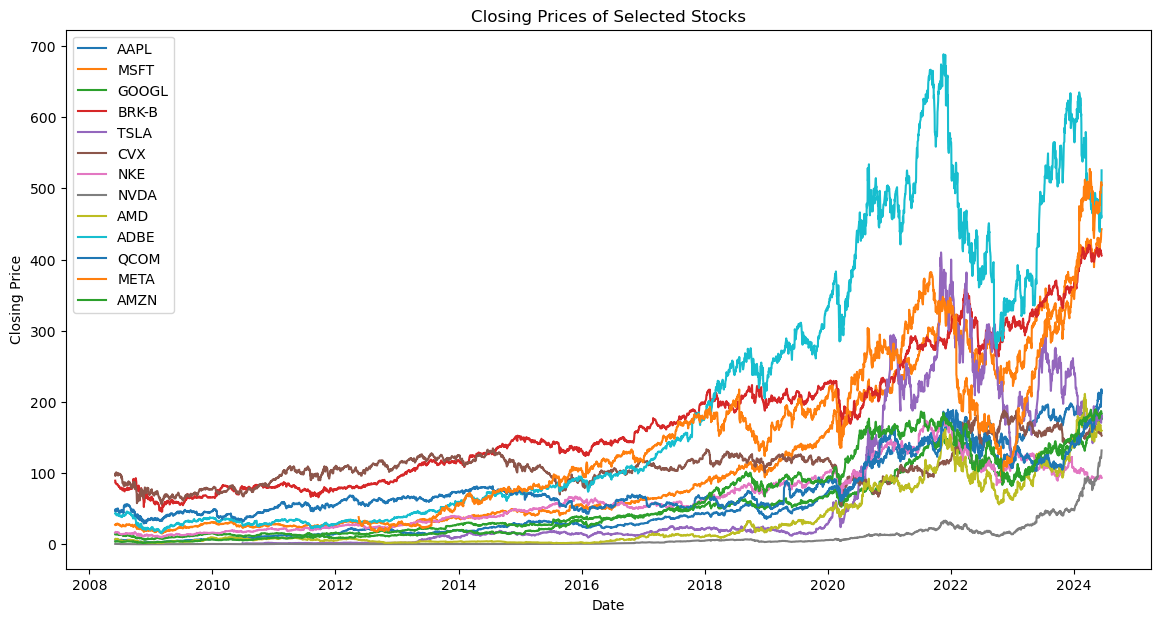

Statistical Summary:
AAPL Summary:
               Open         High          Low        Close    Adj Close  \
count  4037.000000  4037.000000  4037.000000  4037.000000  4037.000000   
mean     57.930358    58.548464    57.343071    57.970938    55.938683   
std      58.290365    58.924602    57.714536    58.347998    58.492134   
min       2.835357     2.928571     2.792857     2.792857     2.358500   
25%      15.928571    16.155714    15.791071    15.930714    13.674253   
50%      29.487499    29.807501    29.250000    29.570000    26.979687   
75%      86.180000    86.949997    83.555000    85.747498    83.645485   
max     214.740005   220.199997   211.600006   214.240005   213.992310   

             Volume         Year        Month          Day  
count  4.037000e+03  4037.000000  4037.000000  4037.000000  
mean   2.885263e+08  2015.931880     6.545207    15.704731  
std    2.911882e+08     4.648664     3.422402     8.750224  
min    2.404830e+07  2008.000000     1.000000     1.0

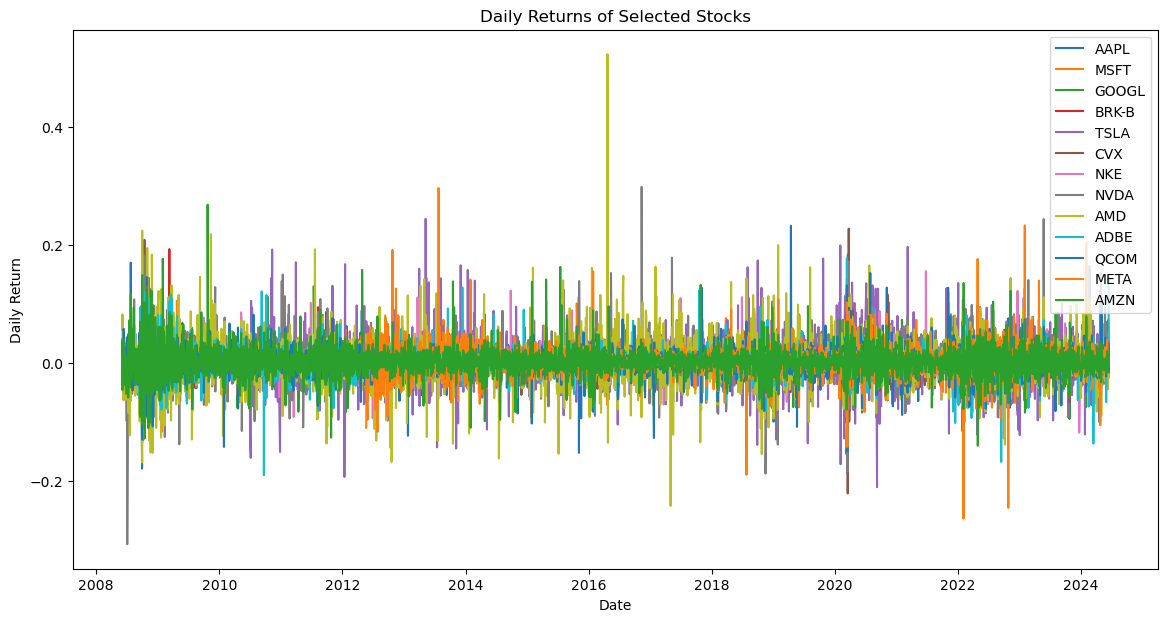

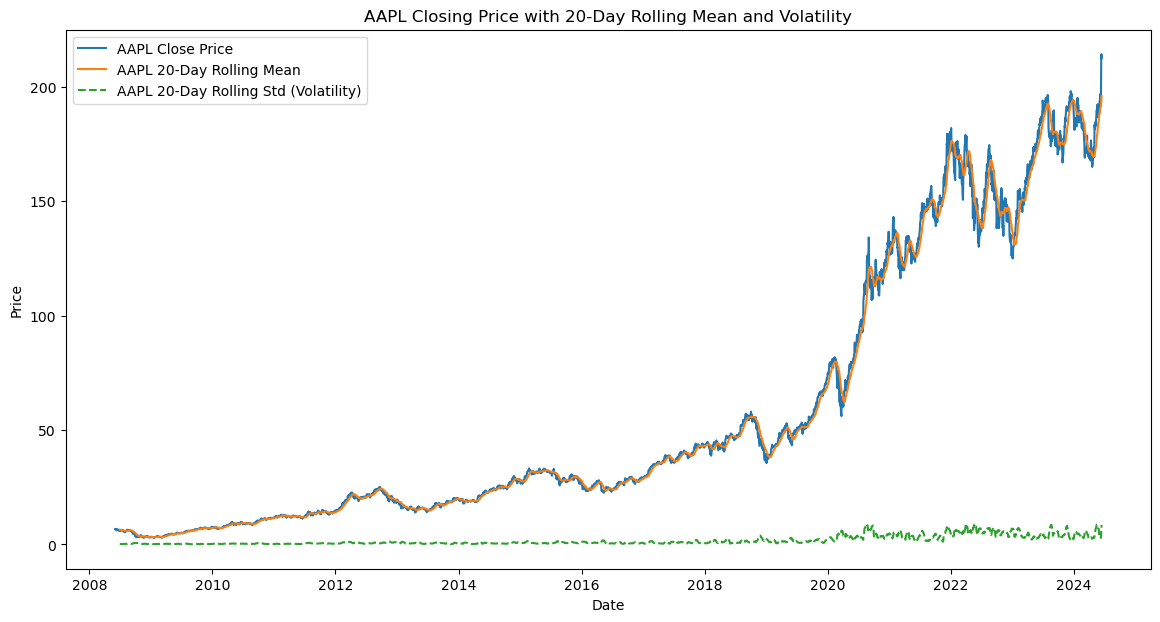

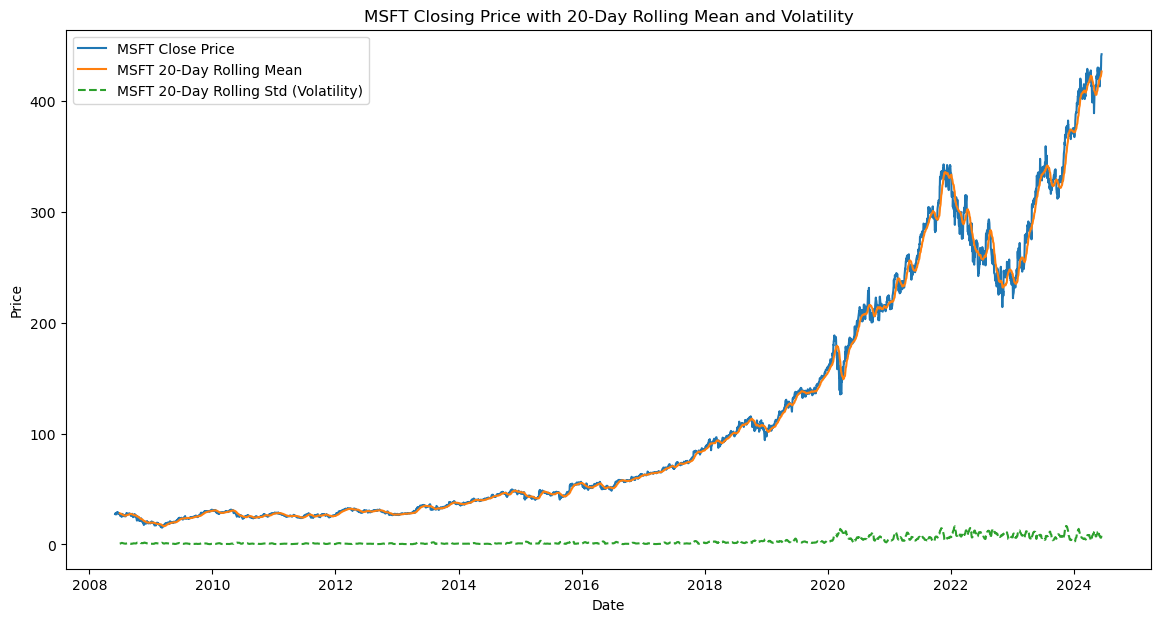

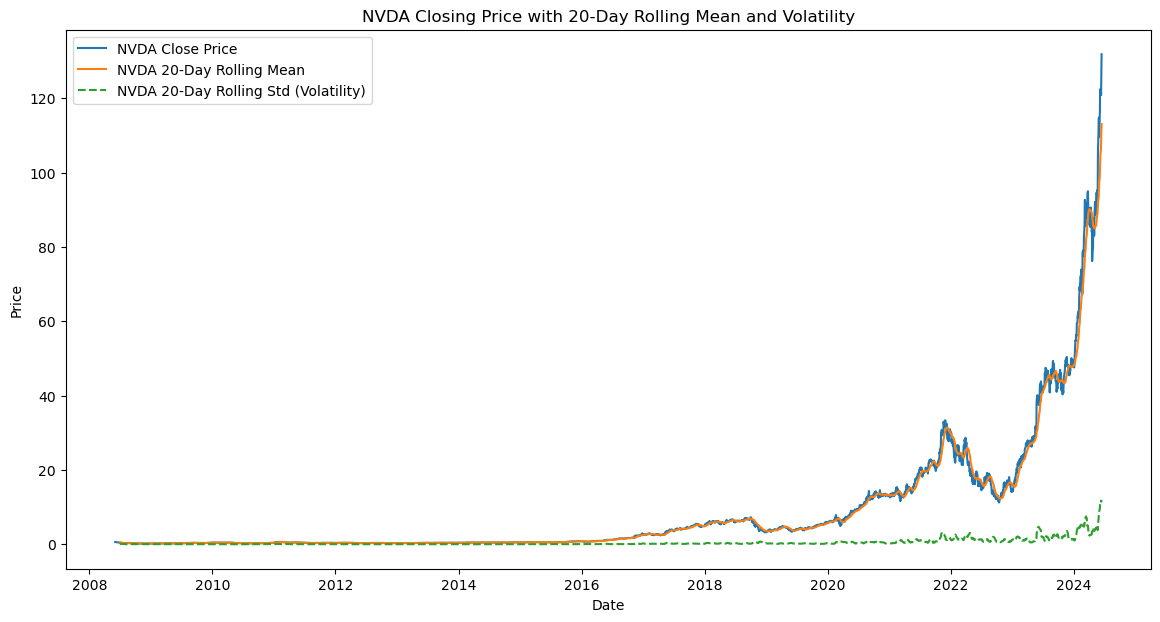

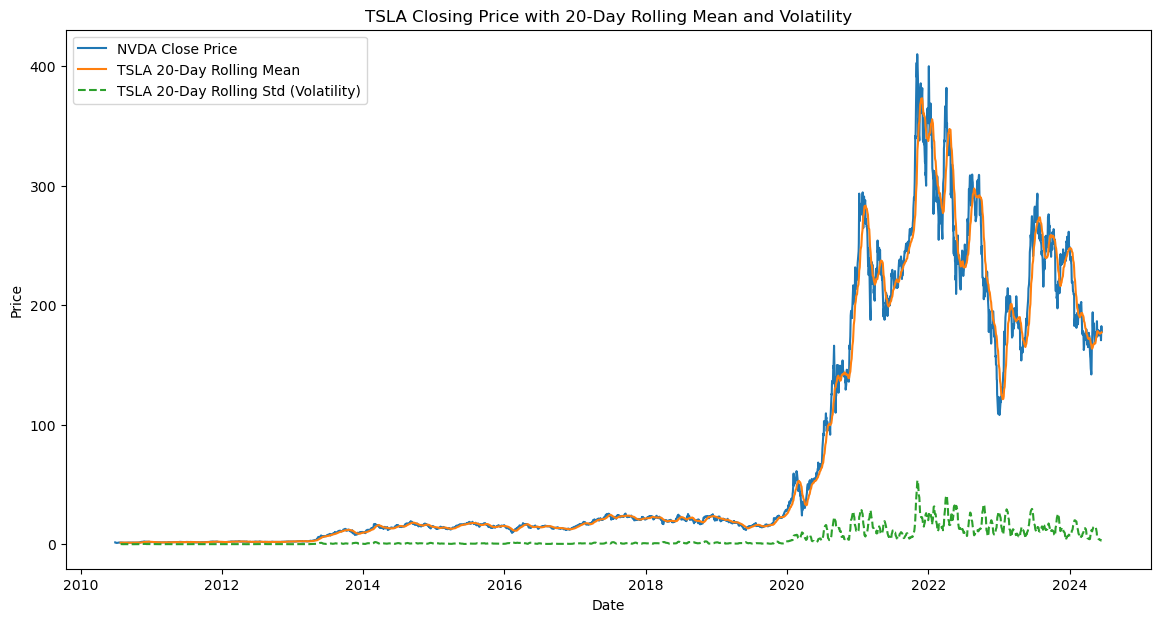

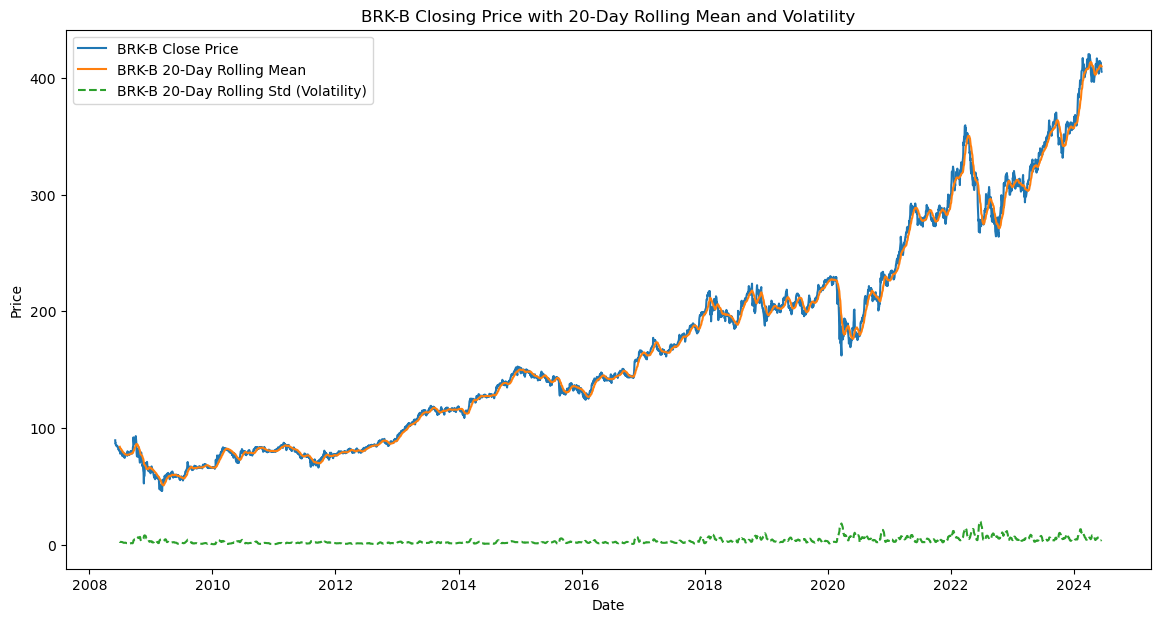

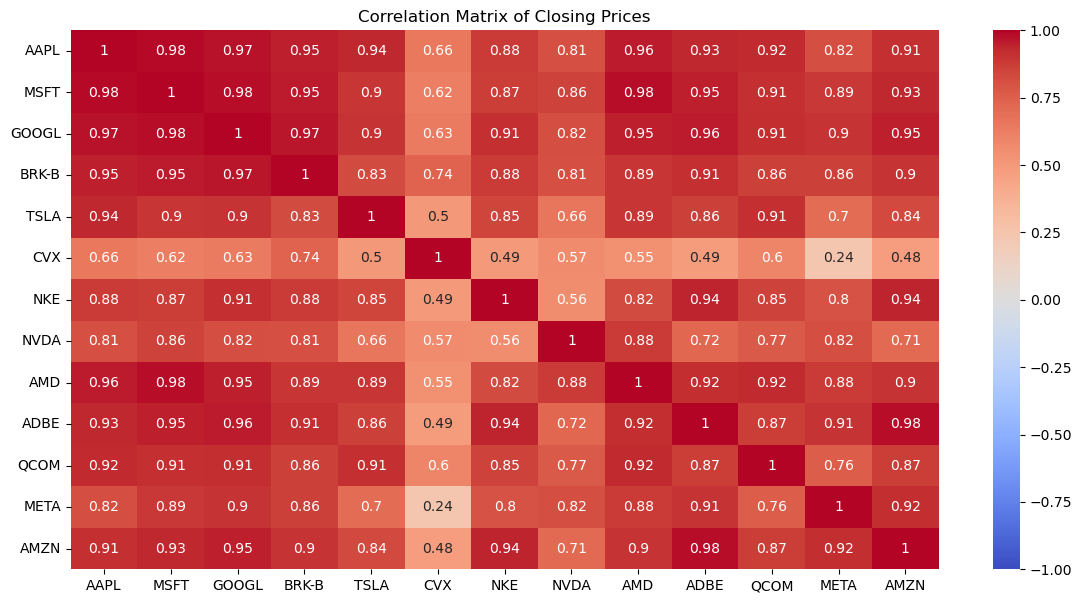

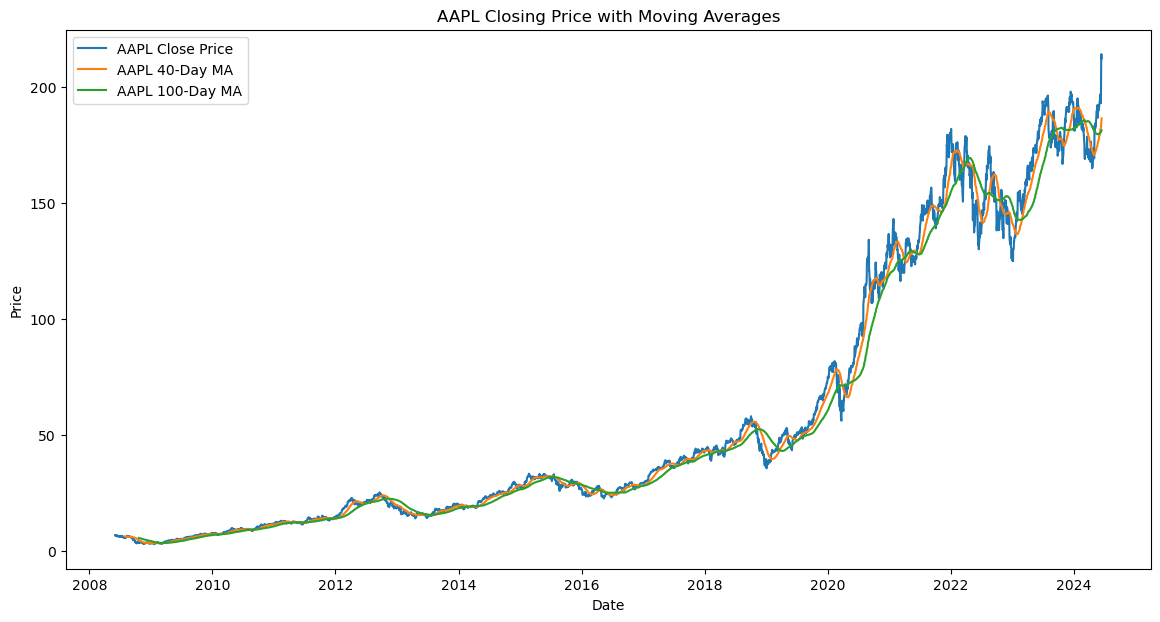

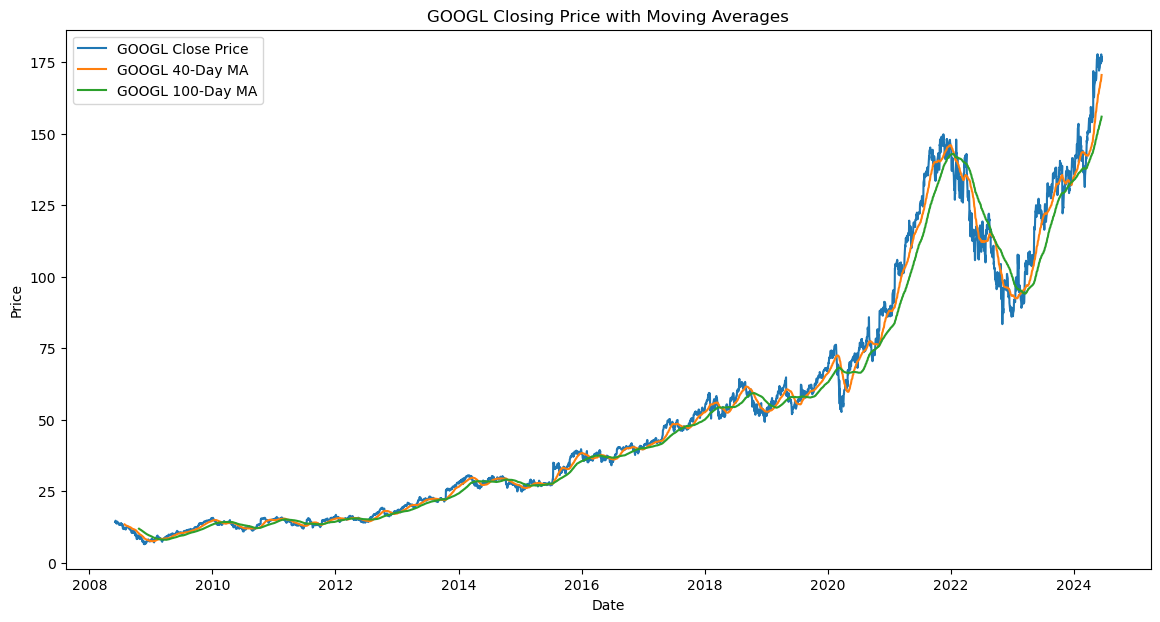

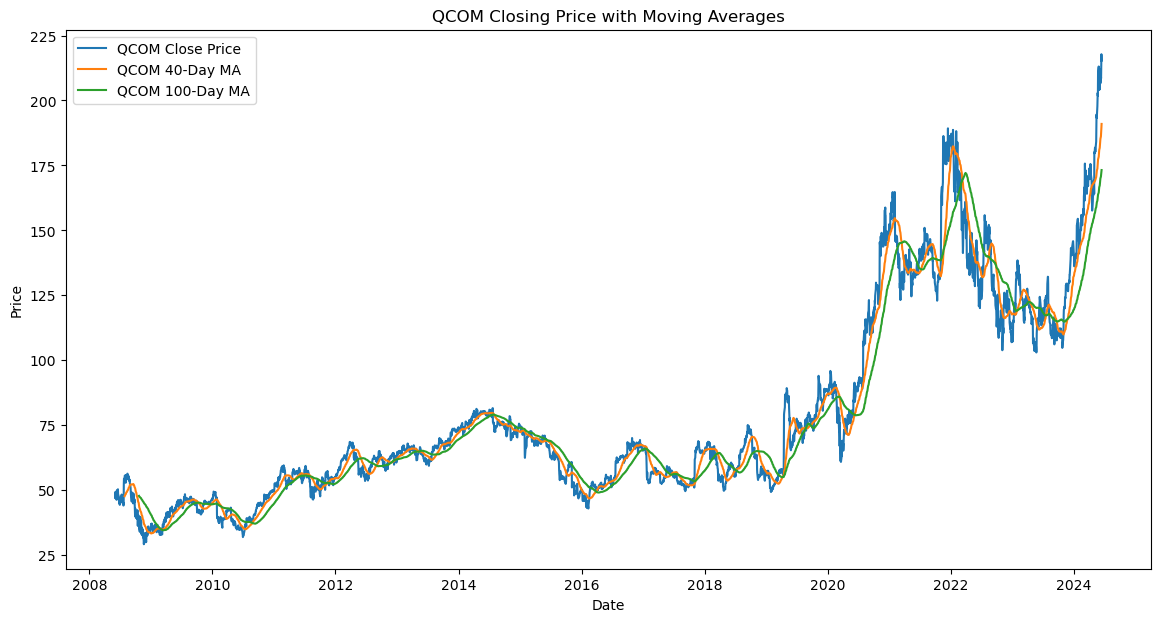

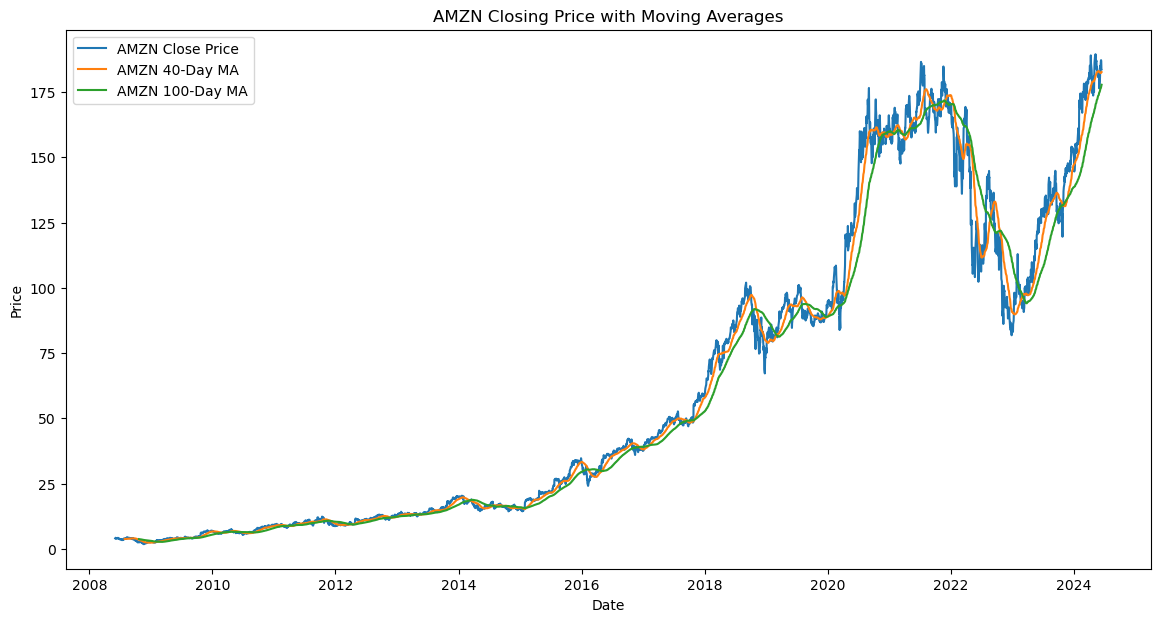

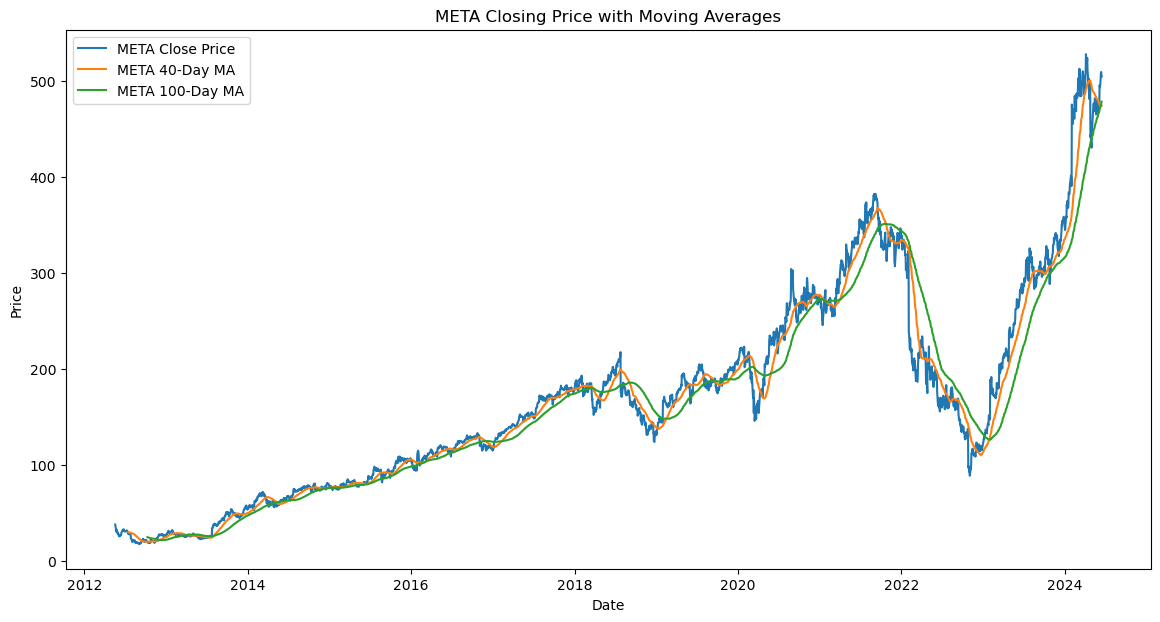

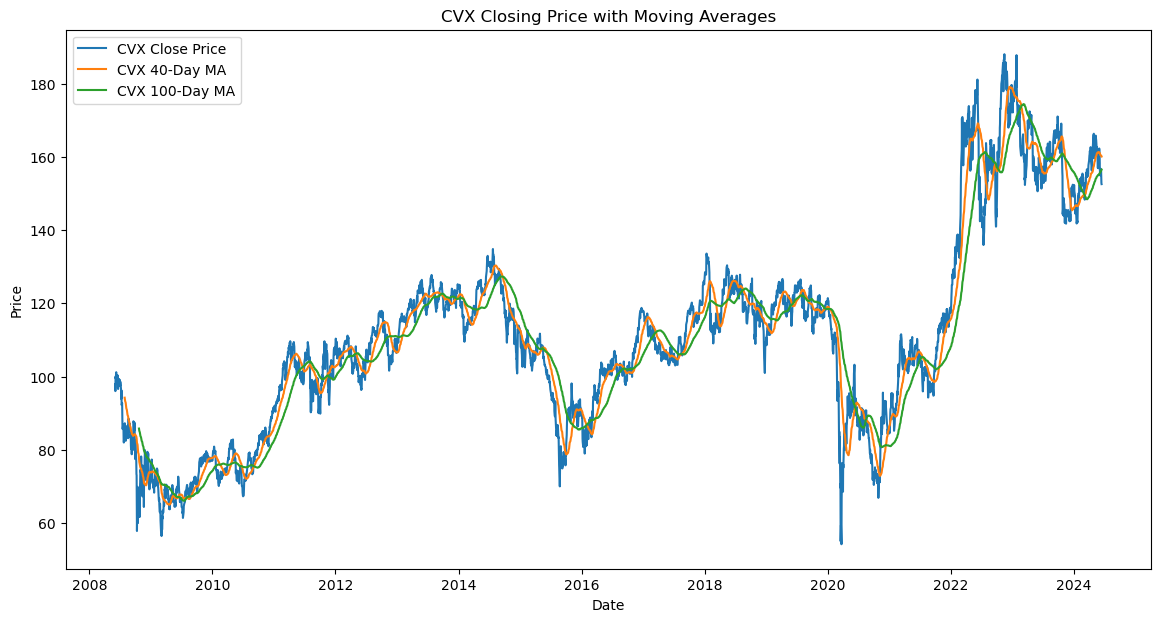

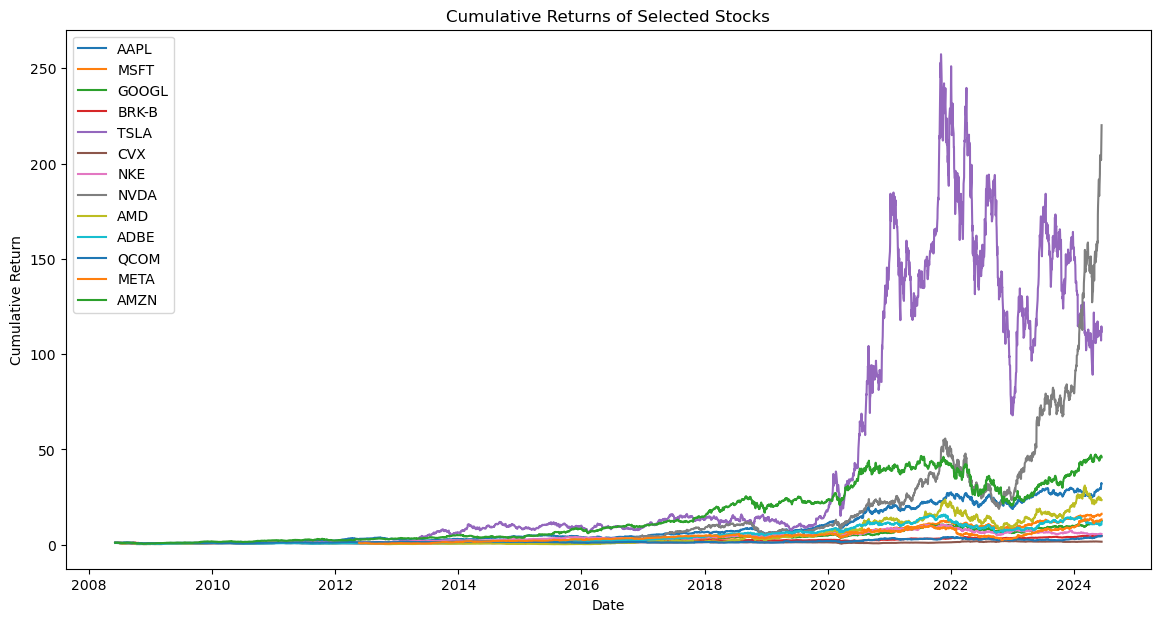

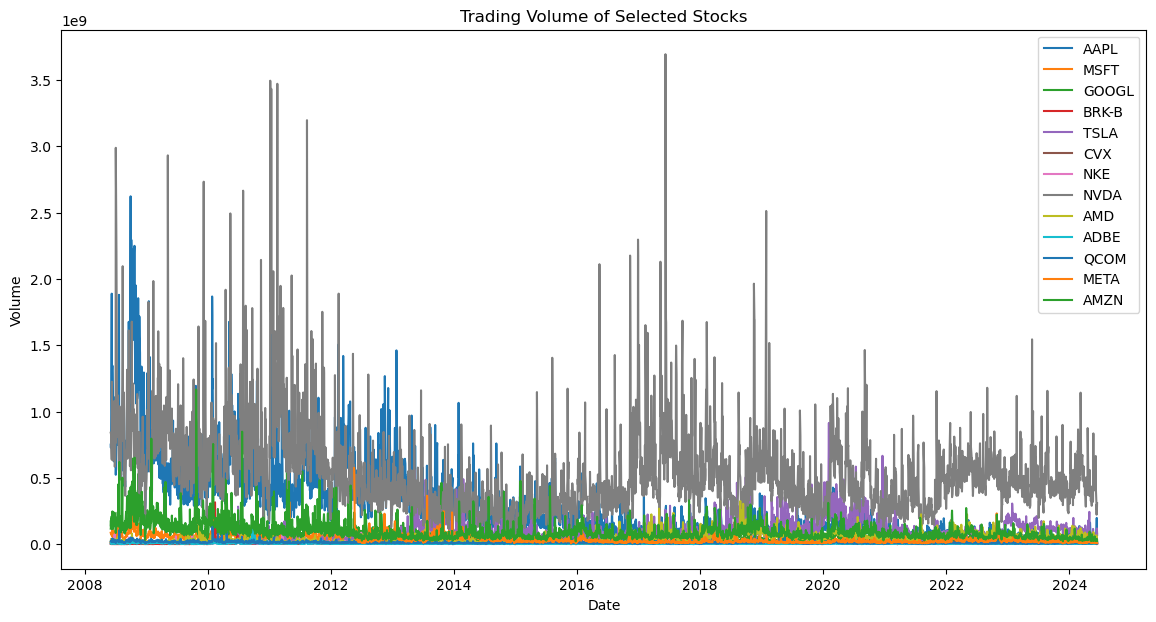

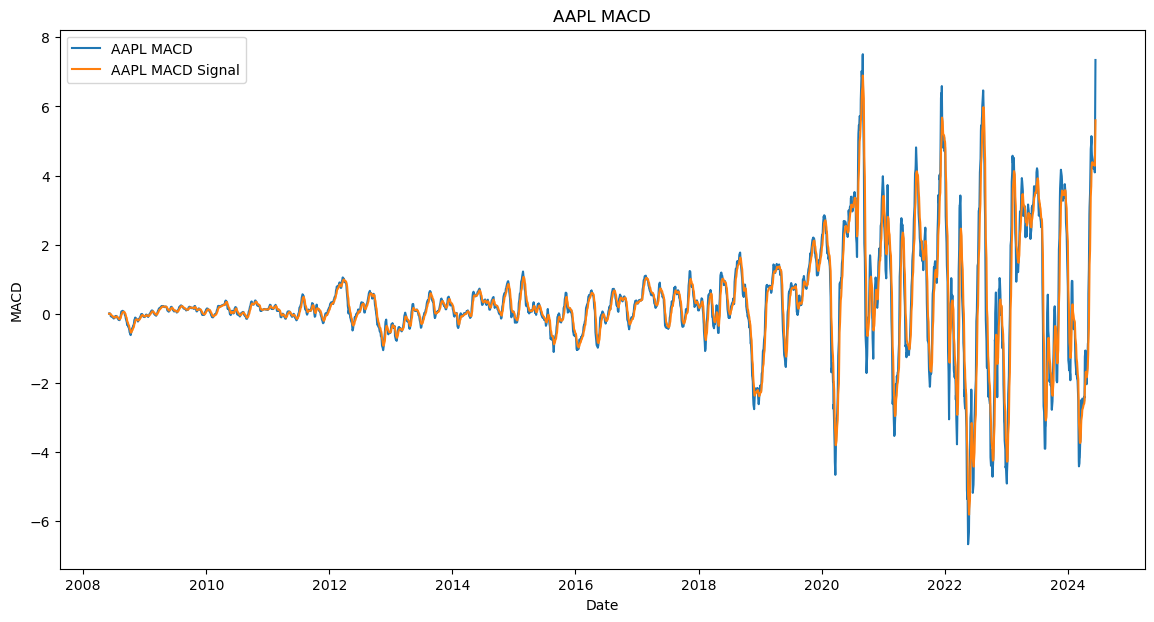

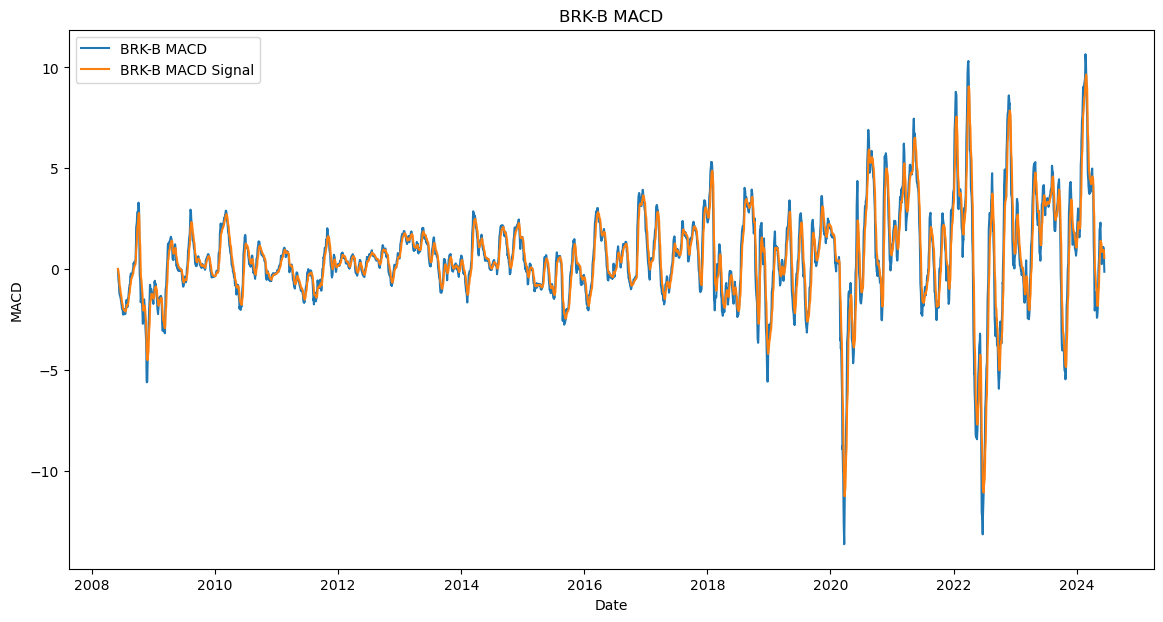

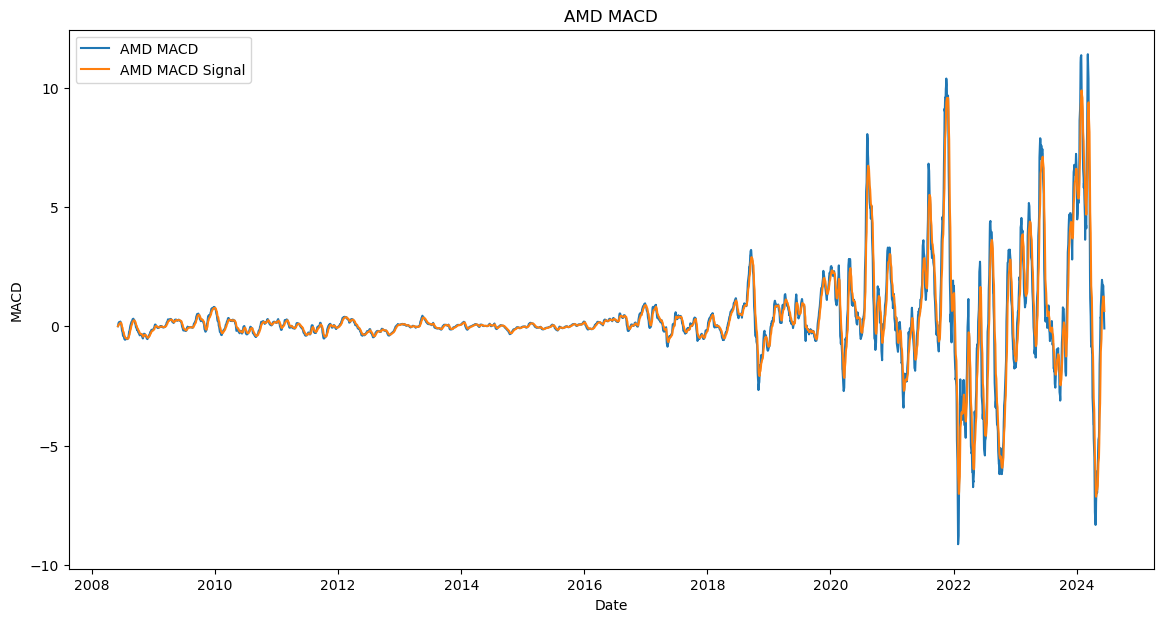

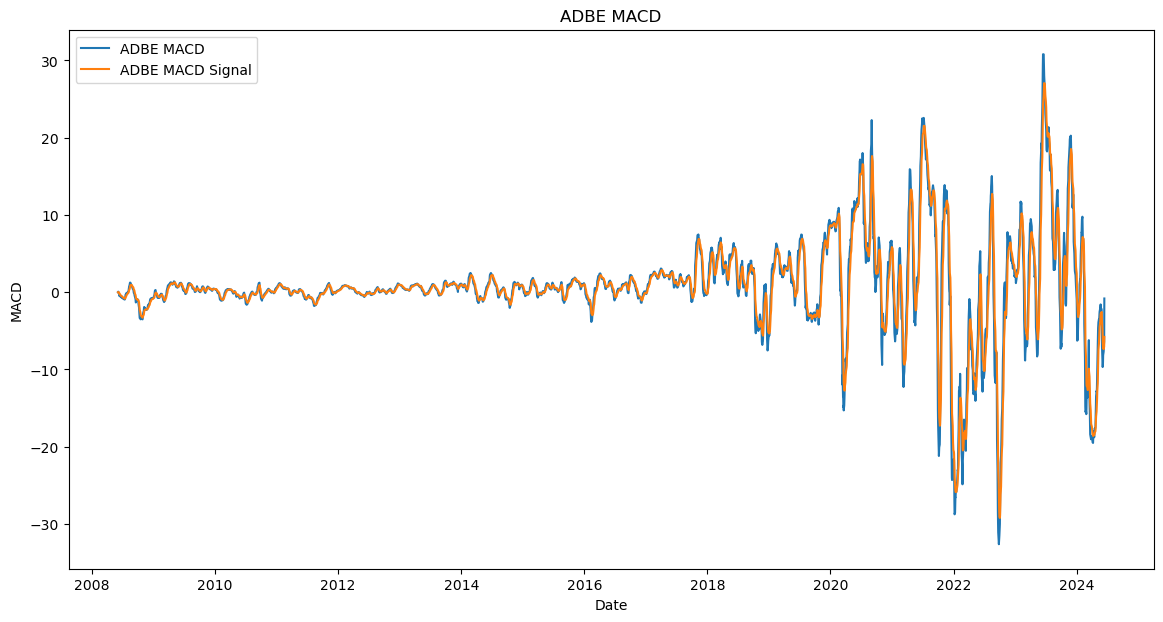

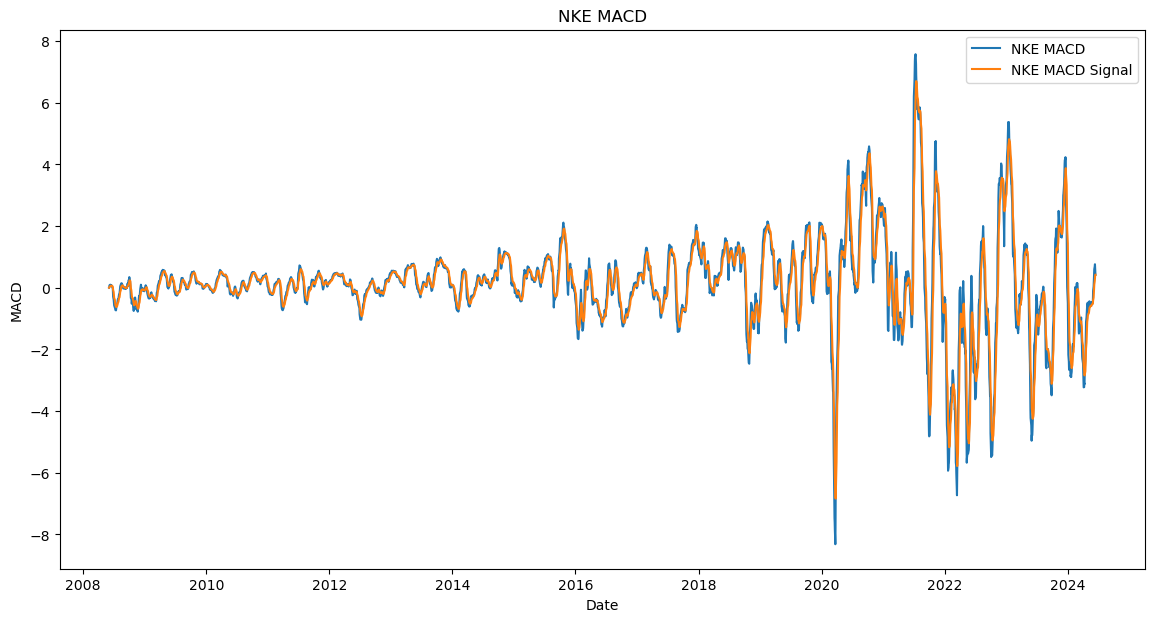

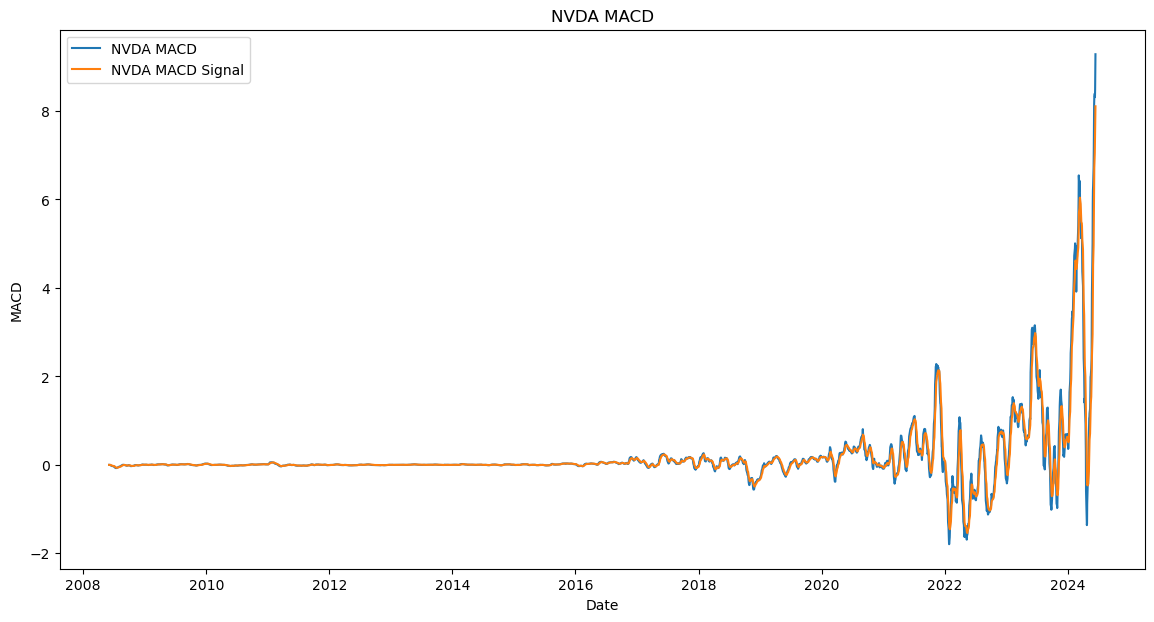

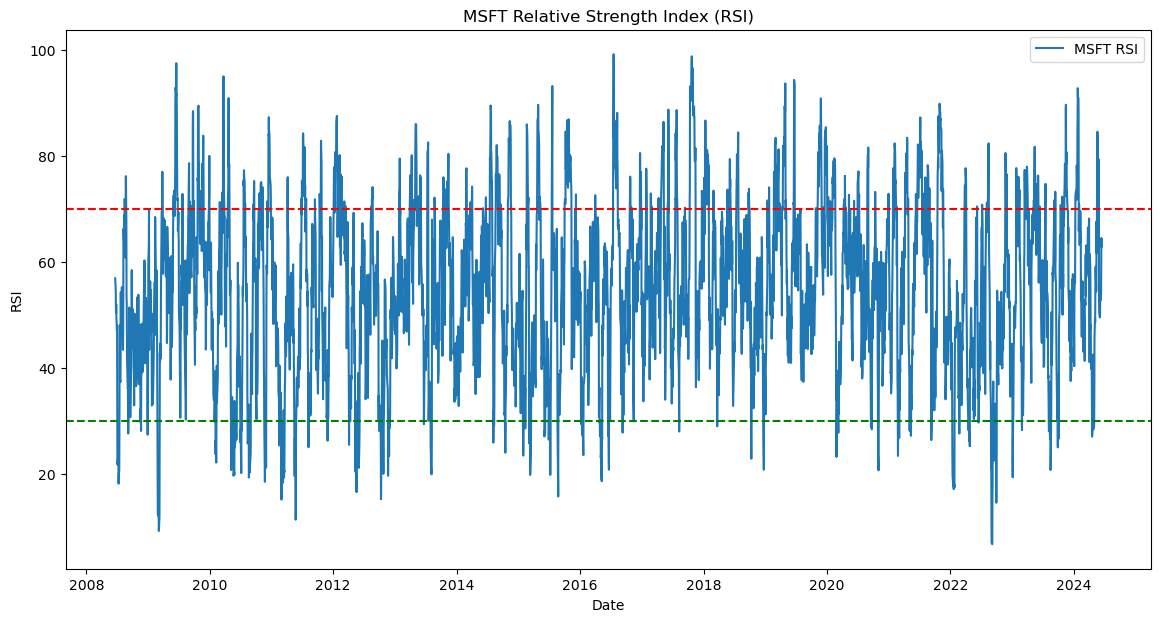

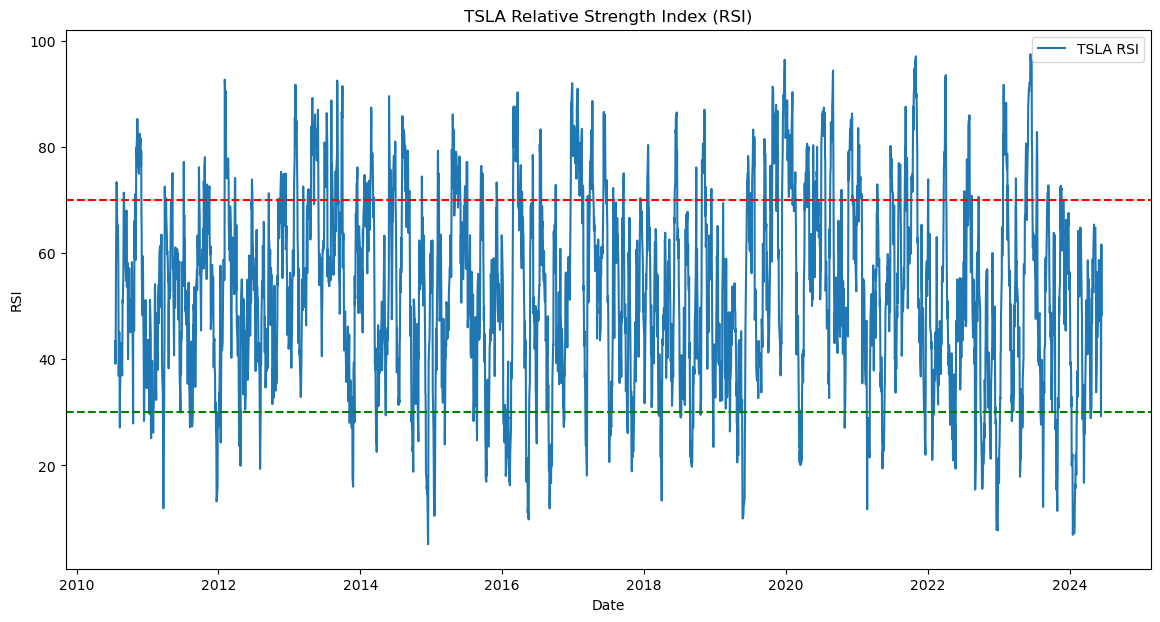

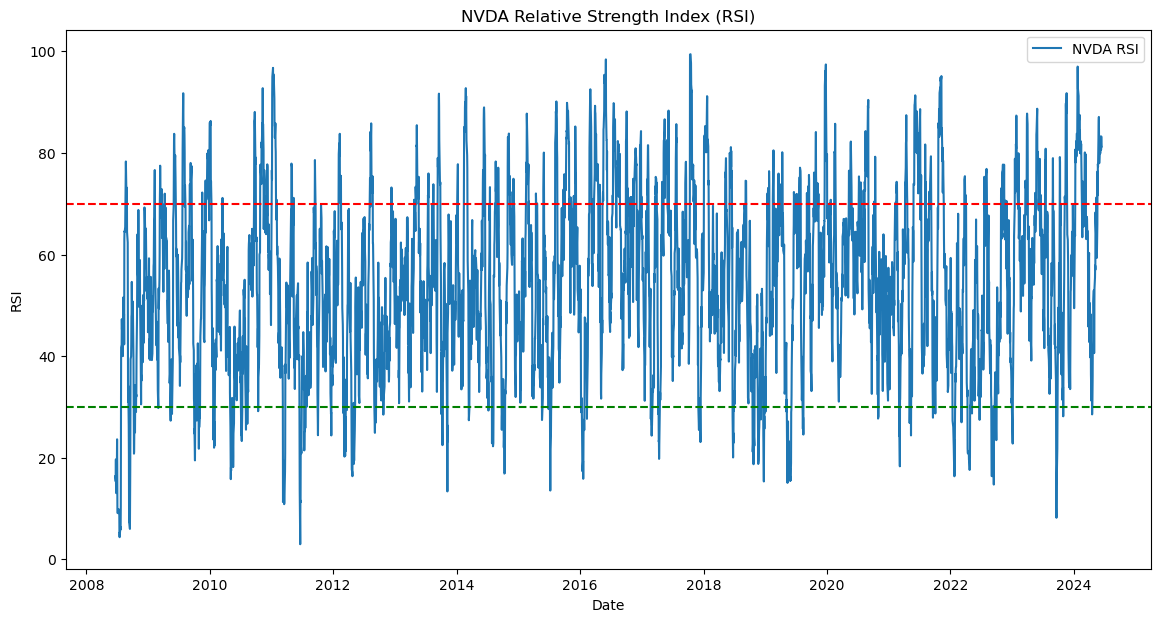

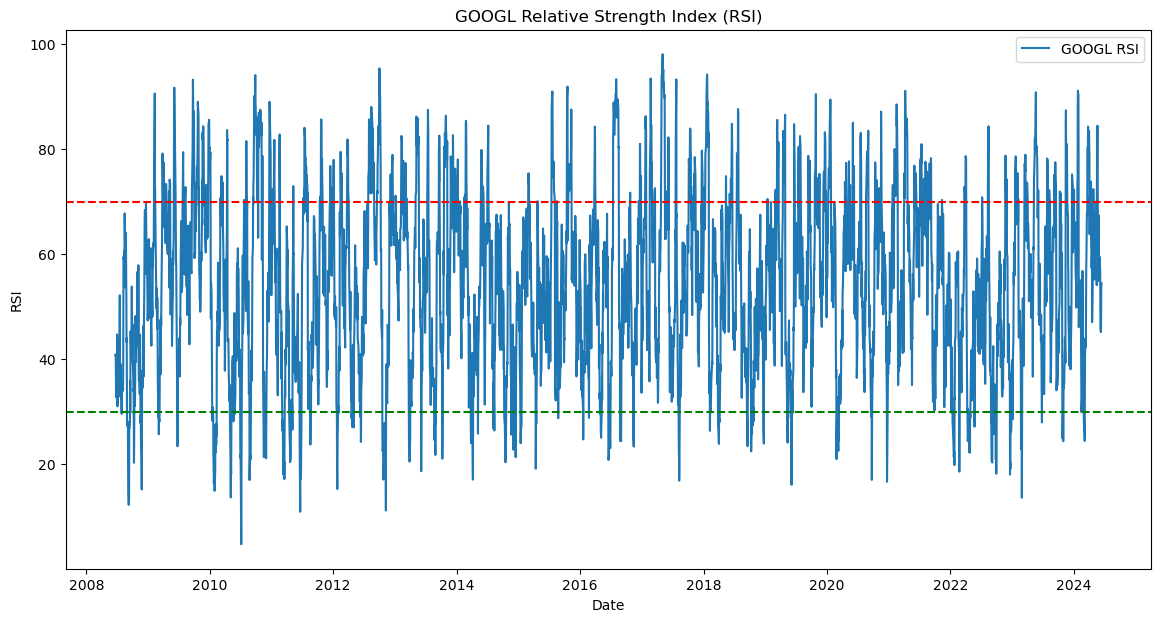

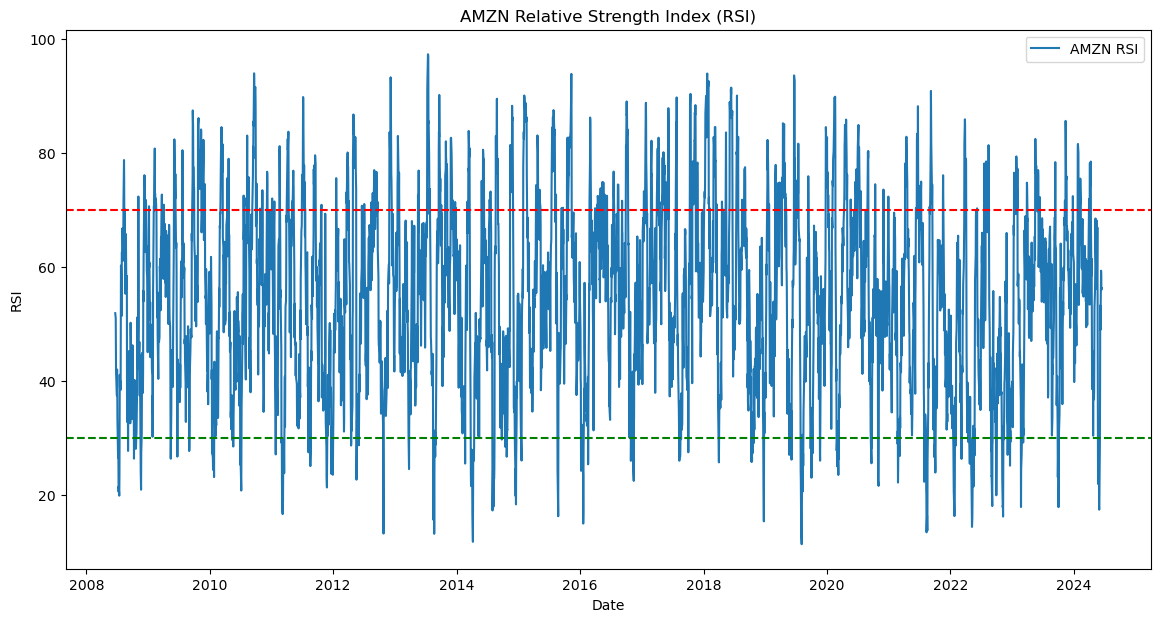

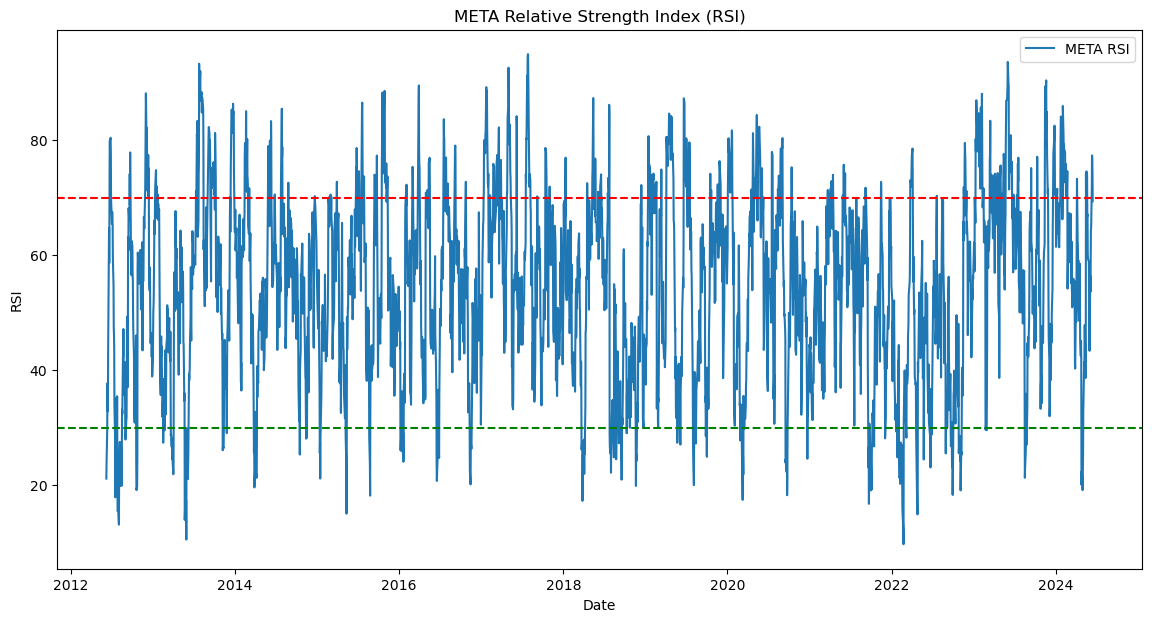

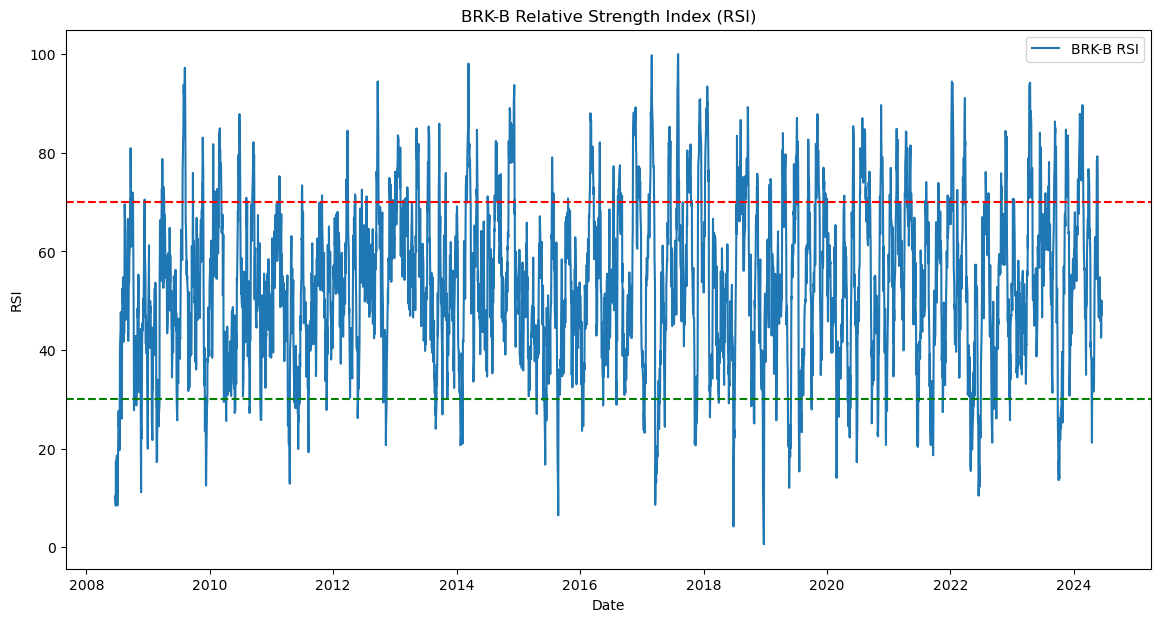

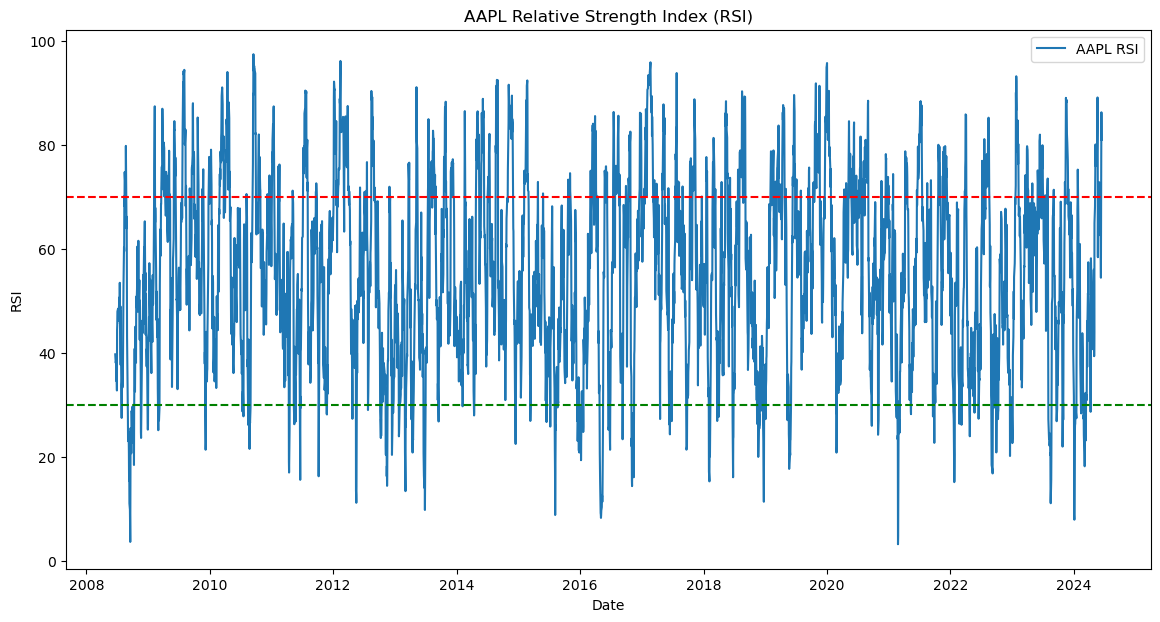

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import talib

# List of tickers
tickers = ["AAPL", "MSFT", "GOOGL", "BRK-B", "TSLA", "CVX", "NKE", "NVDA", "AMD", "ADBE", "QCOM", "META", "AMZN"]

# Load preprocessed data
data = {}
for ticker in tickers:
    data[ticker] = pd.read_csv(f'C:/Users/B_S_OkoliPC/stock-price-fiesta/data/processed/{ticker}_clean.csv', index_col='Date', parse_dates=True)

# Plot closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.lineplot(data=data[ticker], x=data[ticker].index, y='Close', label=ticker)
plt.title('Closing Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Statistical Summary
print("Statistical Summary:")
for ticker in tickers:
    print(f"{ticker} Summary:\n", data[ticker].describe())

# Calculate daily returns
for ticker in tickers:
    data[ticker]['Daily Return'] = data[ticker]['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.lineplot(data=data[ticker], x=data[ticker].index, y='Daily Return', label=ticker)
plt.title('Daily Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Rolling Mean and Standard Deviation (Volatility)
window_size = 20
for ticker in tickers:
    data[ticker]['Rolling Mean'] = data[ticker]['Close'].rolling(window=window_size).mean()
    data[ticker]['Rolling Std'] = data[ticker]['Close'].rolling(window=window_size).std()

# Plot rolling statistics for Apple 
plt.figure(figsize=(14, 7))
plt.plot(data['AAPL']['Close'], label='AAPL Close Price')
plt.plot(data['AAPL']['Rolling Mean'], label=f'AAPL {window_size}-Day Rolling Mean')
plt.plot(data['AAPL']['Rolling Std'], label=f'AAPL {window_size}-Day Rolling Std (Volatility)', linestyle='--')
plt.title(f'AAPL Closing Price with {window_size}-Day Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot rolling statistics for Microsoft 
plt.figure(figsize=(14, 7))
plt.plot(data['MSFT']['Close'], label='MSFT Close Price')
plt.plot(data['MSFT']['Rolling Mean'], label=f'MSFT {window_size}-Day Rolling Mean')
plt.plot(data['MSFT']['Rolling Std'], label=f'MSFT {window_size}-Day Rolling Std (Volatility)', linestyle='--')
plt.title(f'MSFT Closing Price with {window_size}-Day Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot rolling statistics for Nvidia 
plt.figure(figsize=(14, 7))
plt.plot(data['NVDA']['Close'], label='NVDA Close Price')
plt.plot(data['NVDA']['Rolling Mean'], label=f'NVDA {window_size}-Day Rolling Mean')
plt.plot(data['NVDA']['Rolling Std'], label=f'NVDA {window_size}-Day Rolling Std (Volatility)', linestyle='--')
plt.title(f'NVDA Closing Price with {window_size}-Day Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot rolling statistics for Tesla
plt.figure(figsize=(14, 7))
plt.plot(data['TSLA']['Close'], label='NVDA Close Price')
plt.plot(data['TSLA']['Rolling Mean'], label=f'TSLA {window_size}-Day Rolling Mean')
plt.plot(data['TSLA']['Rolling Std'], label=f'TSLA {window_size}-Day Rolling Std (Volatility)', linestyle='--')
plt.title(f'TSLA Closing Price with {window_size}-Day Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot rolling statistics for Berkshire hathaway 
plt.figure(figsize=(14, 7))
plt.plot(data['BRK-B']['Close'], label='BRK-B Close Price')
plt.plot(data['BRK-B']['Rolling Mean'], label=f'BRK-B {window_size}-Day Rolling Mean')
plt.plot(data['BRK-B']['Rolling Std'], label=f'BRK-B {window_size}-Day Rolling Std (Volatility)', linestyle='--')
plt.title(f'BRK-B Closing Price with {window_size}-Day Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Correlation Analysis
combined_data = pd.concat([data[ticker]['Close'] for ticker in tickers], axis=1)
combined_data.columns = tickers
correlation_matrix = combined_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

# Moving Averages (using Apple as an example)
short_window = 40
long_window = 100

data['AAPL']['Short MA'] = data['AAPL']['Close'].rolling(window=short_window).mean()
data['AAPL']['Long MA'] = data['AAPL']['Close'].rolling(window=long_window).mean()

# Moving Averages (using Google as an example)
short_window = 40
long_window = 100

data['GOOGL']['Short MA'] = data['GOOGL']['Close'].rolling(window=short_window).mean()
data['GOOGL']['Long MA'] = data['GOOGL']['Close'].rolling(window=long_window).mean()

# Moving Averages (using Qualcomm as an example)
short_window = 40
long_window = 100

data['QCOM']['Short MA'] = data['QCOM']['Close'].rolling(window=short_window).mean()
data['QCOM']['Long MA'] = data['QCOM']['Close'].rolling(window=long_window).mean()

# Moving Averages (using Amazon as an example)
short_window = 40
long_window = 100

data['AMZN']['Short MA'] = data['AMZN']['Close'].rolling(window=short_window).mean()
data['AMZN']['Long MA'] = data['AMZN']['Close'].rolling(window=long_window).mean()

# Moving Averages (using Meta as an example)
short_window = 40
long_window = 100

data['META']['Short MA'] = data['META']['Close'].rolling(window=short_window).mean()
data['META']['Long MA'] = data['META']['Close'].rolling(window=long_window).mean()

# Moving Averages (using CVX as an example)
short_window = 40
long_window = 100

data['CVX']['Short MA'] = data['CVX']['Close'].rolling(window=short_window).mean()
data['CVX']['Long MA'] = data['CVX']['Close'].rolling(window=long_window).mean()


# Plot Moving Averages for Apple
plt.figure(figsize=(14, 7))
plt.plot(data['AAPL']['Close'], label='AAPL Close Price')
plt.plot(data['AAPL']['Short MA'], label=f'AAPL {short_window}-Day MA')
plt.plot(data['AAPL']['Long MA'], label=f'AAPL {long_window}-Day MA')
plt.title('AAPL Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Moving Averages for Google
plt.figure(figsize=(14, 7))
plt.plot(data['GOOGL']['Close'], label='GOOGL Close Price')
plt.plot(data['GOOGL']['Short MA'], label=f'GOOGL {short_window}-Day MA')
plt.plot(data['GOOGL']['Long MA'], label=f'GOOGL {long_window}-Day MA')
plt.title('GOOGL Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Moving Averages for Qualcomm
plt.figure(figsize=(14, 7))
plt.plot(data['QCOM']['Close'], label='QCOM Close Price')
plt.plot(data['QCOM']['Short MA'], label=f'QCOM {short_window}-Day MA')
plt.plot(data['QCOM']['Long MA'], label=f'QCOM {long_window}-Day MA')
plt.title('QCOM Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Moving Averages for Amazon
plt.figure(figsize=(14, 7))
plt.plot(data['AMZN']['Close'], label='AMZN Close Price')
plt.plot(data['AMZN']['Short MA'], label=f'AMZN {short_window}-Day MA')
plt.plot(data['AMZN']['Long MA'], label=f'AMZN {long_window}-Day MA')
plt.title('AMZN Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Moving Averages for Meta
plt.figure(figsize=(14, 7))
plt.plot(data['META']['Close'], label='META Close Price')
plt.plot(data['META']['Short MA'], label=f'META {short_window}-Day MA')
plt.plot(data['META']['Long MA'], label=f'META {long_window}-Day MA')
plt.title('META Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Moving Averages for CVX
plt.figure(figsize=(14, 7))
plt.plot(data['CVX']['Close'], label='CVX Close Price')
plt.plot(data['CVX']['Short MA'], label=f'CVX {short_window}-Day MA')
plt.plot(data['CVX']['Long MA'], label=f'CVX {long_window}-Day MA')
plt.title('CVX Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Cumulative Returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.lineplot(data=data[ticker], x=data[ticker].index, y='Cumulative Return', label=ticker)
plt.title('Cumulative Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Analyze trading volume
plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.lineplot(data=data[ticker], x=data[ticker].index, y='Volume', label=ticker)
plt.title('Trading Volume of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

'''
# Moving Average Convergence Divergence (MACD) using talib
for ticker in tickers:
    data[ticker]['MACD'], data[ticker]['MACD Signal'], data[ticker]['MACD Hist'] = talib.MACD(data[ticker]['Close'])
'''

# Moving Average Convergence Divergence (MACD)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

for ticker in tickers:
    data[ticker]['MACD'], data[ticker]['MACD Signal'] = calculate_macd(data[ticker])


# Plot MACD for Apple
plt.figure(figsize=(14, 7))
plt.plot(data['AAPL'].index, data['AAPL']['MACD'], label='AAPL MACD')
plt.plot(data['AAPL'].index, data['AAPL']['MACD Signal'], label='AAPL MACD Signal')
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot MACD for Berkshire Hathaway
plt.figure(figsize=(14, 7))
plt.plot(data['BRK-B'].index, data['BRK-B']['MACD'], label='BRK-B MACD')
plt.plot(data['BRK-B'].index, data['BRK-B']['MACD Signal'], label='BRK-B MACD Signal')
plt.title('BRK-B MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot MACD for AMD
plt.figure(figsize=(14, 7))
plt.plot(data['AMD'].index, data['AMD']['MACD'], label='AMD MACD')
plt.plot(data['AMD'].index, data['AMD']['MACD Signal'], label='AMD MACD Signal')
plt.title('AMD MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot MACD for Adobe
plt.figure(figsize=(14, 7))
plt.plot(data['ADBE'].index, data['ADBE']['MACD'], label='ADBE MACD')
plt.plot(data['ADBE'].index, data['ADBE']['MACD Signal'], label='ADBE MACD Signal')
plt.title('ADBE MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot MACD for Nike
plt.figure(figsize=(14, 7))
plt.plot(data['NKE'].index, data['NKE']['MACD'], label='NKE MACD')
plt.plot(data['NKE'].index, data['NKE']['MACD Signal'], label='NKE MACD Signal')
plt.title('NKE MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot MACD for Nvidia
plt.figure(figsize=(14, 7))
plt.plot(data['NVDA'].index, data['NVDA']['MACD'], label='NVDA MACD')
plt.plot(data['NVDA'].index, data['NVDA']['MACD Signal'], label='NVDA MACD Signal')
plt.title('NVDA MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

'''
# Relative Strength Index (RSI) using talib
rsi_period = 14
for ticker in tickers:
    data[ticker]['RSI'] = talib.RSI(data[ticker]['Close'], timeperiod=rsi_period)
'''

def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

for ticker in tickers:
    data[ticker]['RSI'] = calculate_rsi(data[ticker])

# Plot RSI for Microsoft as an example
plt.figure(figsize=(14, 7))
plt.plot(data['MSFT'].index, data['MSFT']['RSI'], label='MSFT RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('MSFT Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot RSI for Tesla as an example
plt.figure(figsize=(14, 7))
plt.plot(data['TSLA'].index, data['TSLA']['RSI'], label='TSLA RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('TSLA Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot RSI for Nvidia as an example
plt.figure(figsize=(14, 7))
plt.plot(data['NVDA'].index, data['NVDA']['RSI'], label='NVDA RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('NVDA Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot RSI for Google as an example
plt.figure(figsize=(14, 7))
plt.plot(data['GOOGL'].index, data['GOOGL']['RSI'], label='GOOGL RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('GOOGL Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot RSI for Amazon as an example
plt.figure(figsize=(14, 7))
plt.plot(data['AMZN'].index, data['AMZN']['RSI'], label='AMZN RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('AMZN Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot RSI for Meta as an example
plt.figure(figsize=(14, 7))
plt.plot(data['META'].index, data['META']['RSI'], label='META RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('META Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot RSI for Berkshire Hathaway as an example
plt.figure(figsize=(14, 7))
plt.plot(data['BRK-B'].index, data['BRK-B']['RSI'], label='BRK-B RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('BRK-B Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot RSI for Apple as an example
plt.figure(figsize=(14, 7))
plt.plot(data['AAPL'].index, data['AAPL']['RSI'], label='AAPL RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('AAPL Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()